In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

from my_transformer import AttentionHead, MultiHeadAttention, TransformerBlock, PositionalEmbedding, TransformerBody, MyBERT

# AttentionHead test

In [2]:
batch_size = 1
seq_length = 5
d_model = 5

attn_head = AttentionHead(d_model=d_model)

data = np.eye(seq_length, d_model)
data = torch.from_numpy(data[np.newaxis, :, :]).float()

attn_head.key_layer = nn.Identity()
attn_head.value_layer = nn.Identity()
attn_head.query_layer = nn.Identity()
attn_head.scale_factor = 1

mask = torch.ones(batch_size, seq_length)

hidden_state = attn_head(data, mask)
print(hidden_state)

tensor([[[0.4046, 0.1488, 0.1488, 0.1488, 0.1488],
         [0.1488, 0.4046, 0.1488, 0.1488, 0.1488],
         [0.1488, 0.1488, 0.4046, 0.1488, 0.1488],
         [0.1488, 0.1488, 0.1488, 0.4046, 0.1488],
         [0.1488, 0.1488, 0.1488, 0.1488, 0.4046]]])


In [3]:
def test_attention_head_output_shape():

    def with_given_input_shape(batch_size, seq_length, d_model, attn_mask=None):
        attn_head = AttentionHead(d_model=d_model)
        data = np.random.randn(batch_size, seq_length, d_model)
        data = torch.from_numpy(data).float()
        if attn_mask is None:
            mask = torch.ones(batch_size, seq_length)
        else:
            mask = attn_mask
        hidden_state = attn_head(data, mask)
        assert hidden_state.shape == (batch_size, seq_length, d_model), f"Wrong attention head output shape. Expected: {(batch_size, seq_length, d_model)}, got: {hidden_state.shape}"
    
    with_given_input_shape(batch_size=32, seq_length=128, d_model=512)
    attn_mask = torch.zeros(32, 128)
    with_given_input_shape(batch_size=32, seq_length=128, d_model=512, attn_mask=attn_mask)
    attn_mask = torch.ones(32, 128)
    with_given_input_shape(batch_size=32, seq_length=128, d_model=512, attn_mask=attn_mask)
    attn_mask = torch.ones(32, 128)
    attn_mask[:, 64:] = 0
    with_given_input_shape(batch_size=32, seq_length=128, d_model=512, attn_mask=attn_mask)
    attn_mask = torch.ones(32, 128)
    attn_mask[:, :64] = 0
    with_given_input_shape(batch_size=32, seq_length=128, d_model=512, attn_mask=attn_mask)
    attn_mask = torch.ones(32, 128)
    attn_mask[:, 0] = 0
    with_given_input_shape(batch_size=32, seq_length=128, d_model=512, attn_mask=attn_mask)
    attn_mask = torch.ones(32, 128)
    attn_mask[np.where(np.random.randn(32, 128) < 0)] = 0
    with_given_input_shape(batch_size=32, seq_length=128, d_model=512, attn_mask=attn_mask)

    with_given_input_shape(batch_size=1, seq_length=1, d_model=1)
    with_given_input_shape(batch_size=1, seq_length=0, d_model=1)


test_attention_head_output_shape()


# MultiHeadAttention test

In [4]:
d_model = 512
batch_size = 32
seq_length = 128
n_heads = 5

attn_head = MultiHeadAttention(d_model=d_model, n_heads=n_heads)
data = np.random.randn(batch_size, seq_length, d_model)
data = torch.from_numpy(data).float()
mask = torch.ones(batch_size, seq_length)
hidden_state = attn_head(data, mask)
hidden_state.shape

torch.Size([32, 128, 512])

# TransformerBlock test

In [5]:
d_model = 512
batch_size = 32
seq_length = 128
n_heads = 5

attn_head = TransformerBlock(d_model=d_model, n_heads=n_heads)
data = np.random.randn(batch_size, seq_length, d_model)
data = torch.from_numpy(data).float()
mask = torch.ones(batch_size, seq_length)
hidden_state = attn_head(data, mask)
hidden_state.shape

torch.Size([32, 128, 512])

# PositionalEmbedding test

1.0 -0.9999999703936631


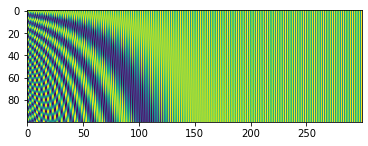

torch.Size([32, 100, 300])


In [6]:
batch_size = 32
vocab_size = 10000
d_model = 300
seq_length = 100
device = "cuda"

positional_embedding = PositionalEmbedding(vocab_size, d_model, seq_length).to(device)

pos_encodings = positional_embedding._generate_position_encodings()[0]
print(pos_encodings.max().item(), pos_encodings.min().item())
plt.imshow(pos_encodings) # https://miro.medium.com/max/1400/1*8-QKpf2HebMEnN8qfdAUSg.png
plt.show()

input_ids = np.random.randint(0, vocab_size, (batch_size, seq_length))
input_ids = torch.from_numpy(input_ids).to(device)

embeddings = positional_embedding(input_ids)

print(embeddings.shape)


# TransformerBody test

In [7]:
d_model = 300
batch_size = 32
seq_length = 128
n_layers = 12
n_heads = 12 

device = "cuda"

model = TransformerBody(d_model=d_model, n_heads=n_heads, n_layers=n_layers)
model = model.to(device)
data = np.random.randn(batch_size, seq_length, d_model)
data = torch.from_numpy(data).float().to(device)
mask = torch.ones(batch_size, seq_length).to(device)

hidden_state = model(data, mask)

print(hidden_state.shape)


torch.Size([32, 128, 300])


# MyBERT test

In [8]:
vocab_size = 500000

d_model = 300
batch_size = 2
seq_length = 128
n_layers = 12
n_heads = 12

device = "cuda"

model = MyBERT(vocab_size=vocab_size, seq_length=seq_length, d_model=d_model, n_heads=n_heads, n_layers=n_layers)
model = model.to(device)
data = np.random.randint(0, vocab_size, (batch_size, seq_length))
data = torch.from_numpy(data).to(device)
mask = torch.ones(batch_size, seq_length).to(device)


In [11]:
predictions = model(data, mask)
predictions[0].shape

torch.Size([2, 128, 500000])